<a href="https://colab.research.google.com/github/ertgrulyksk/Fifa21-EDA-and-Data-Visualization/blob/main/Fifa21_EDA_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 16.6 MB 55.6 MB/s 
     |████████████████████████████████| 7.8 MB 35.7 MB/s 


In [4]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=aba4441a907cb2b15dee52260132982a0ceac630c784886aa6f5cbc935983dbb
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [5]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import geopandas as gpd
import pycountry
from math import pi
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
#Read data
data=pd.read_csv('fifa21.csv', sep=';')
data.shape

(17981, 9)

In [7]:
#Have a look at the data
data.head(5)

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [8]:
data.isnull().any()

player_id      False
name           False
nationality    False
position       False
overall        False
age            False
hits           False
potential      False
team           False
dtype: bool

In [9]:
data['team'] = data['team'].str.strip()

In [10]:
foo = lambda x: pd.Series([i for i in x.split('|')])
pos = data['position'].apply(foo)
pos.head(5)

,0,1,2,3,4
0,ST,CF,RW,NaN,NaN
1,ST,LW,NaN,NaN,NaN
2,CAM,LW,NaN,NaN,NaN
3,CB,NaN,NaN,NaN,NaN
4,GK,NaN,NaN,NaN,NaN


In [11]:
data['pos_1']=pos[0]
data['pos_2']=pos[1]
data['pos_3']=pos[2]
data['pos_4']=pos[3]
data['pos_5']=pos[4]

data.head(5)

,player_id,name,nationality,position,overall,age,hits,potential,team,pos_1,pos_2,pos_3,pos_4,pos_5
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona,ST,CF,RW,NaN,NaN
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus,ST,LW,NaN,NaN,NaN
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain,CAM,LW,NaN,NaN,NaN
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool,CB,NaN,NaN,NaN,NaN
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid,GK,NaN,NaN,NaN,NaN


In [12]:
data.drop(['position'], axis = 1,inplace=True) 

In [13]:
for col in ['age', 'overall', 'potential', 'hits']:
    data[col] = data[col].astype(int)

In [14]:
def player_data(x):
    return data.loc[data['name']==x]

def country_data(x):
    return data[data['nationality'] == x][['name','overall','potential','pos_1','hits','age','team']]

def team_data(x):
    return data[data['team'] == x][['name','overall','potential','pos_1','hits','age']]

In [15]:
player_data('Lionel Messi')

,player_id,name,nationality,overall,age,hits,potential,team,pos_1,pos_2,pos_3,pos_4,pos_5
0,158023,Lionel Messi,Argentina,94,33,299,94,FC Barcelona,ST,CF,RW,NaN,NaN


In [16]:
country_data('Turkey')

,name,overall,potential,pos_1,hits,age,team
426,Çaglar Söyüncü,80,85,CB,42,24,Leicester City
474,Hakan Çalhanoglu,80,81,CM,34,26,Milan
729,Burak Yilmaz,79,79,ST,15,35,Besiktas JK
752,Cengiz Ünder,78,84,RM,23,23,Roma
868,Okay Yokuslu,78,83,CDM,1,26,RC Celta
943,Ömer Toprak,78,78,CB,2,31,SV Werder Bremen
1000,Ozan Kabak,77,86,CB,31,20,FC Schalke 04
1003,Merih Demiral,77,86,CB,48,22,Juventus
1029,Yusuf Yazici,77,82,RM,9,23,LOSC Lille
1062,Irfan Can Kahveci,77,82,CM,5,25,Medipol Basaksehir FK


In [17]:
team_data('Fenerbahçe SK')

,name,overall,potential,pos_1,hits,age
210,Max Kruse,83,83,ST,5,32
390,Luiz Gustavo,81,81,CB,4,33
1271,Emre Belözoglu,77,77,CDM,6,39
1377,Vedat Muriqi,76,79,ST,10,26
1436,Garry Rodrigues,76,76,RM,0,29
1540,Serdar Aziz,76,77,CB,2,29
1845,Deniz Türüç,75,75,RM,2,27
2049,Mauricio Isla,75,75,RB,4,32
2221,Miha Zajc,74,79,CM,3,26
2467,Simon Falette,74,76,CB,3,28


In [18]:
eldest = data.sort_values('age', ascending = False)[['name', 'nationality', 'age']].head(5)
eldest.set_index('name', inplace=True)
print(eldest)

                          nationality  age
name                                      
Hussain Omar Sulaimani   Saudi Arabia   43
Leao Butrón                      Peru   43
Luis Fernando Fernández      Colombia   42
Gianluigi Buffon                Italy   42
Hilton                         Brazil   42


In [19]:
youngest = data.sort_values('age', ascending = True)[['name', 'nationality', 'age']].head(5)
youngest.set_index('name', inplace=True)
print(youngest)

                   nationality  age
name                               
Eduardo Camavinga       France   17
Gabriele Plechero        Italy   17
Jayden Nelson           Canada   17
Tom Dickson-Peters    Scotland   17
Elias Damergy          Tunisia   17


In [20]:
data.groupby(['team'])['age'].mean().sort_values(ascending = False).head(5)

team
Beijing Renhe FC                       31.333333
Tianjin Tianhai FC                     30.700000
Mineros de Guayana                     30.333333
Júbilo Iwata                           30.250000
Chongqing Dangdai Lifan FC SWM Team    30.166667
Name: age, dtype: float64

In [21]:
data.groupby(['team'])['age'].mean().sort_values(ascending = True).head(5)

team
UCD AFC                 21.000000
FC Groningen            22.068966
FC Nordsjælland         22.157895
FC Bayern München II    22.240000
Fortuna Sittard         22.666667
Name: age, dtype: float64

In [22]:
data.groupby(['team'])['nationality'].nunique().sort_values(ascending = False).head()

team
Free Agents         30
Newcastle United    20
SV Zulte Waregem    18
Napoli              17
KAS Eupen           17
Name: nationality, dtype: int64

In [23]:
data.groupby(['team'])['nationality'].nunique().sort_values(ascending = True).head()

team
Botafogo            1
Cittadella          1
Santos              1
Atlético Mineiro    1
São Paulo           1
Name: nationality, dtype: int64

In [24]:
data.groupby(['team'])['overall'].max().sort_values(ascending = False).head()

team
FC Barcelona           94
Juventus               93
Paris Saint-Germain    92
Manchester City        91
Liverpool              91
Name: overall, dtype: int64

In [25]:
data.groupby(['team'])['potential'].max().sort_values(ascending = False).head()

team
Paris Saint-Germain    95
Borussia Dortmund      94
FC Barcelona           94
Atlético Madrid        93
Juventus               93
Name: potential, dtype: int64

In [26]:
player_features = ('age', 'overall', 'hits', 'potential')

# Top 2 features for every position in football

for i, val in data.groupby(data['pos_1'])[player_features].mean().iterrows():
    print('Position {}: {}, {}'.format(i, *tuple(val.nlargest(2).index)))

Position CAM: potential, overall
Position CB: potential, overall
Position CDM: potential, overall
Position CF: potential, overall
Position CM: potential, overall
Position GK: potential, overall
Position LB: potential, overall
Position LM: potential, overall
Position LW: potential, overall
Position LWB: potential, overall
Position RB: potential, overall
Position RM: potential, overall
Position RW: potential, overall
Position RWB: potential, overall
Position ST: potential, overall


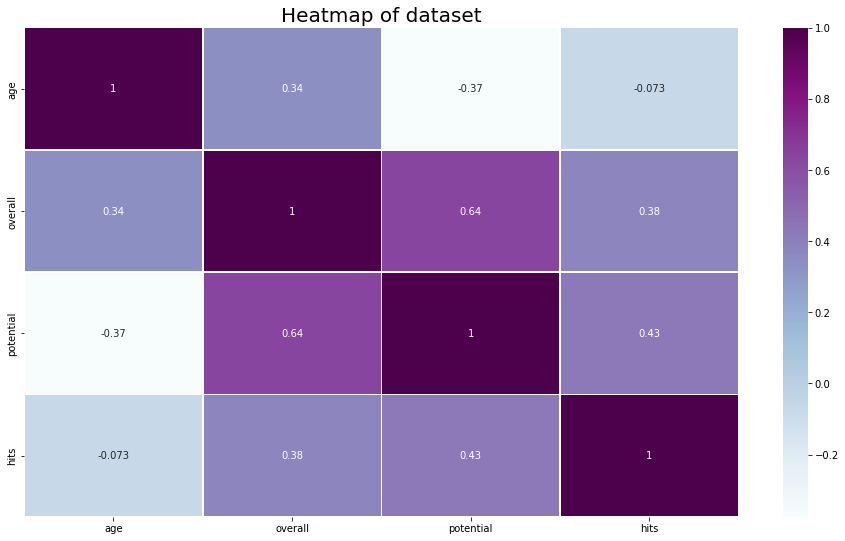

In [27]:
plt.rcParams['figure.figsize']=(16,9)
hmap=sns.heatmap(data[['age', 'overall', 'potential', 'hits']].corr(), annot = True, linewidths=.5, cmap='BuPu')
hmap.set_title(label='Heatmap of dataset', fontsize=20)
hmap;

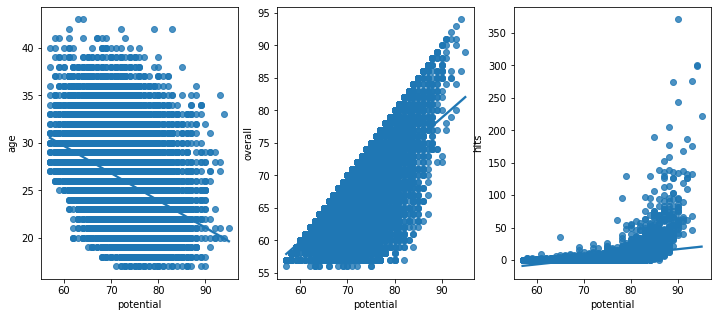

In [28]:
def scatter_plot(df):
    feats = ('age', 'overall', 'hits')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/3+1, 3, index+1)
        ax = sns.regplot(x = 'potential', y = feat, data = df)

plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4)

scatter_plot(data)

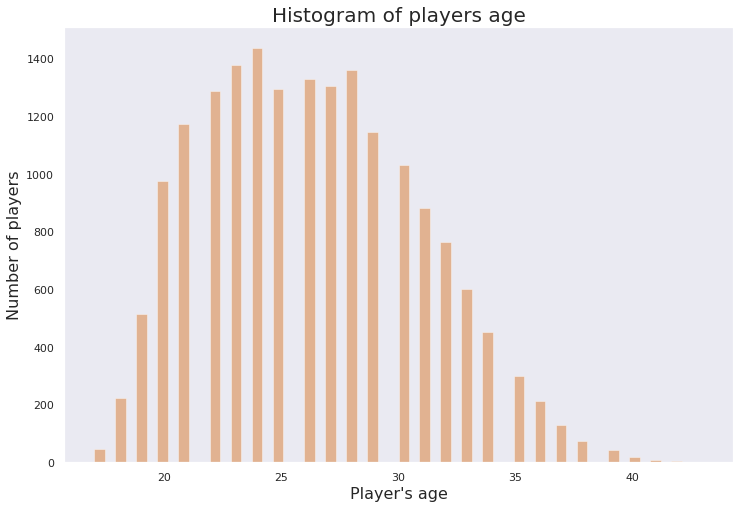

In [29]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = data.age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='r')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

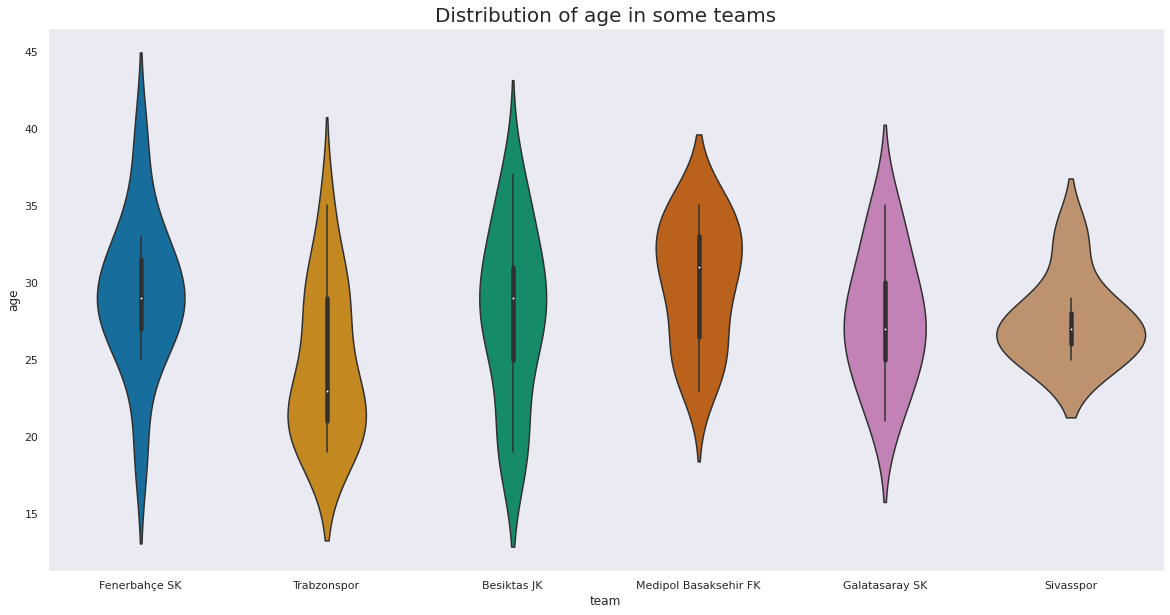

In [30]:
# Compare six teams in relation to age
turkish_teams = ('Fenerbahçe SK', 'Galatasaray SK', 'Besiktas JK', 'Sivasspor', 'Medipol Basaksehir FK', 'Trabzonspor')
df_team = data.loc[data['team'].isin(turkish_teams) & data['age']]



fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="team", y="age", data=df_team);
ax.set_title(label='Distribution of age in some teams', fontsize=20);

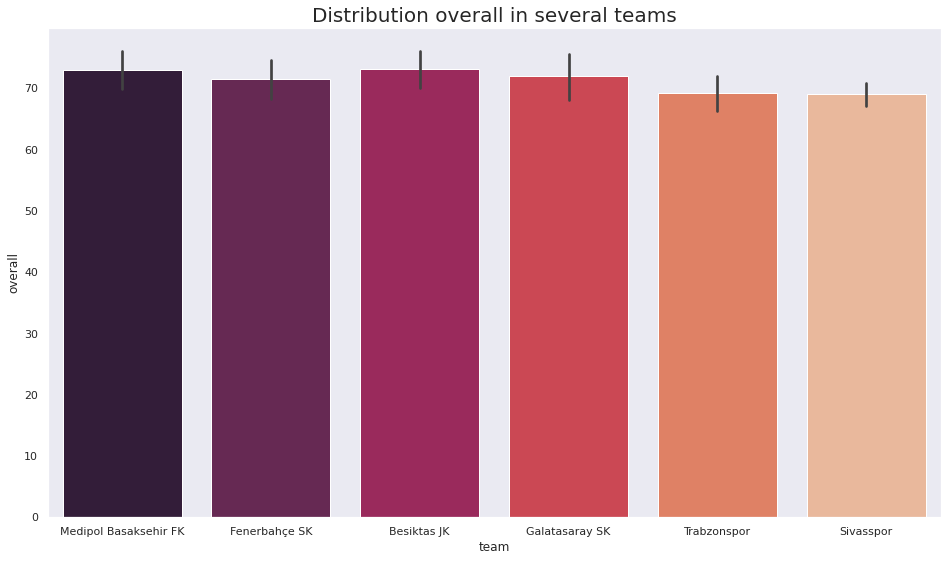

In [31]:
# Compare six teams in relation to overall ratings
turkish_teams = ('Fenerbahçe SK', 'Galatasaray SK', 'Besiktas JK', 'Sivasspor', 'Medipol Basaksehir FK', 'Trabzonspor')
df_team = data.loc[data['team'].isin(turkish_teams)  & data['overall'] ]

ax = sns.barplot(x=df_team['team'], y=df_team['overall'], palette="rocket");
ax.set_title(label='Distribution overall in several teams', fontsize=20);

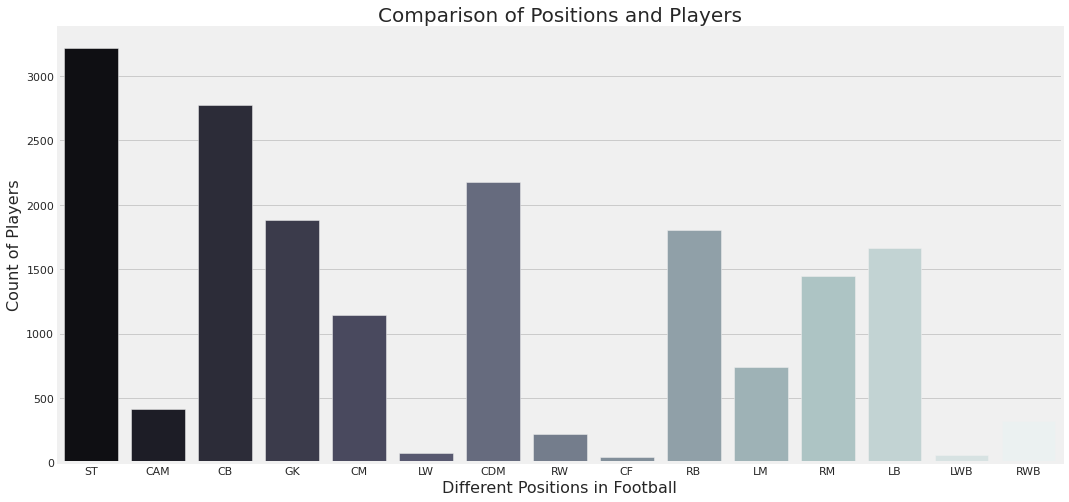

In [32]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('pos_1', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

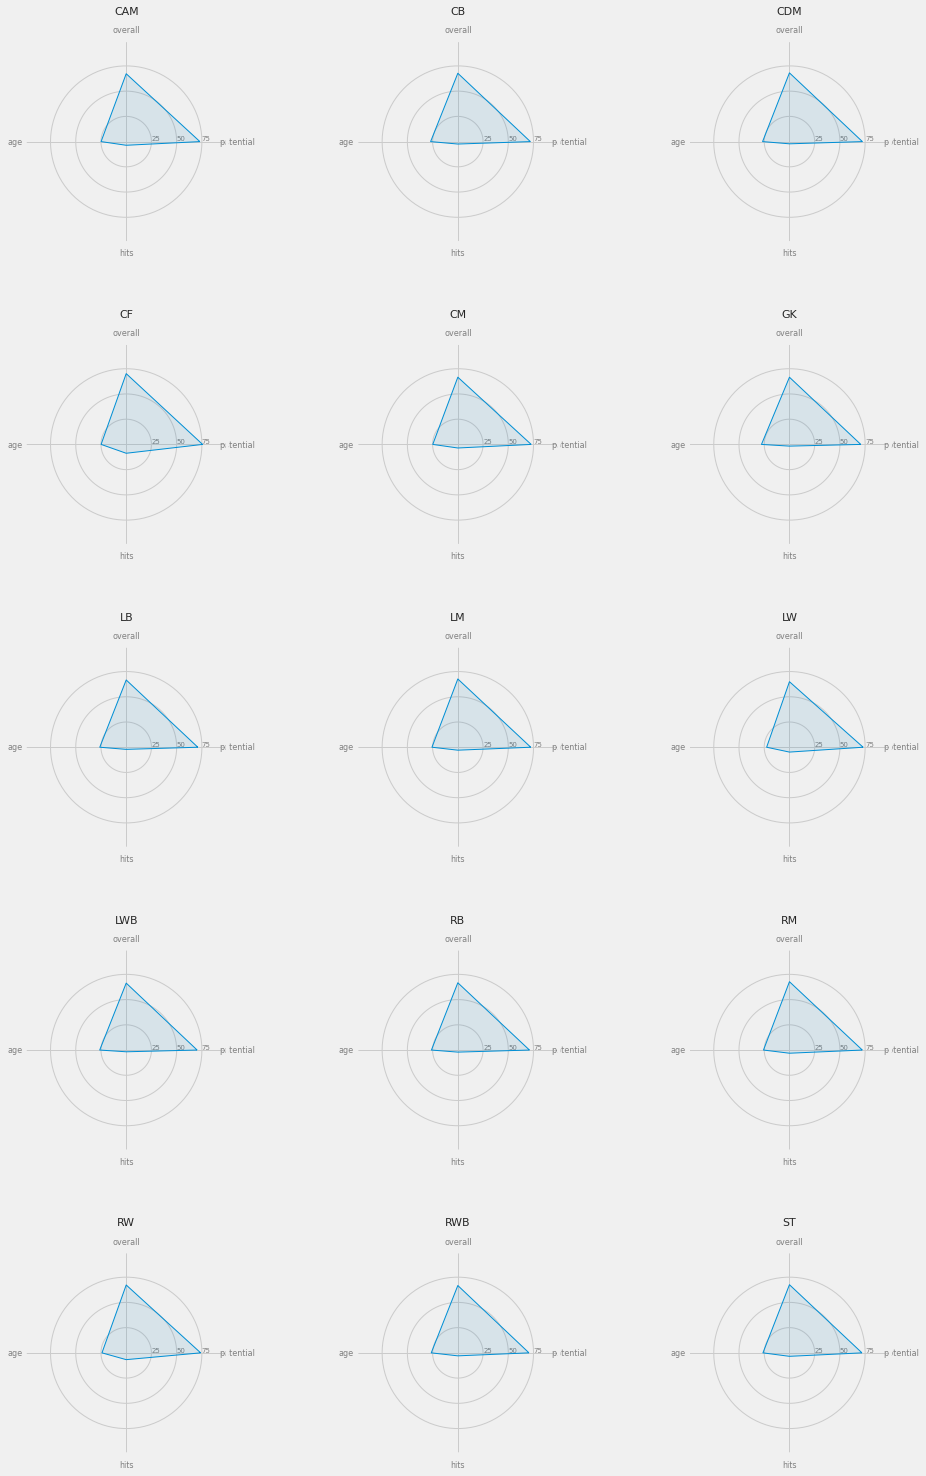

In [33]:
#Spider plot

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['pos_1'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

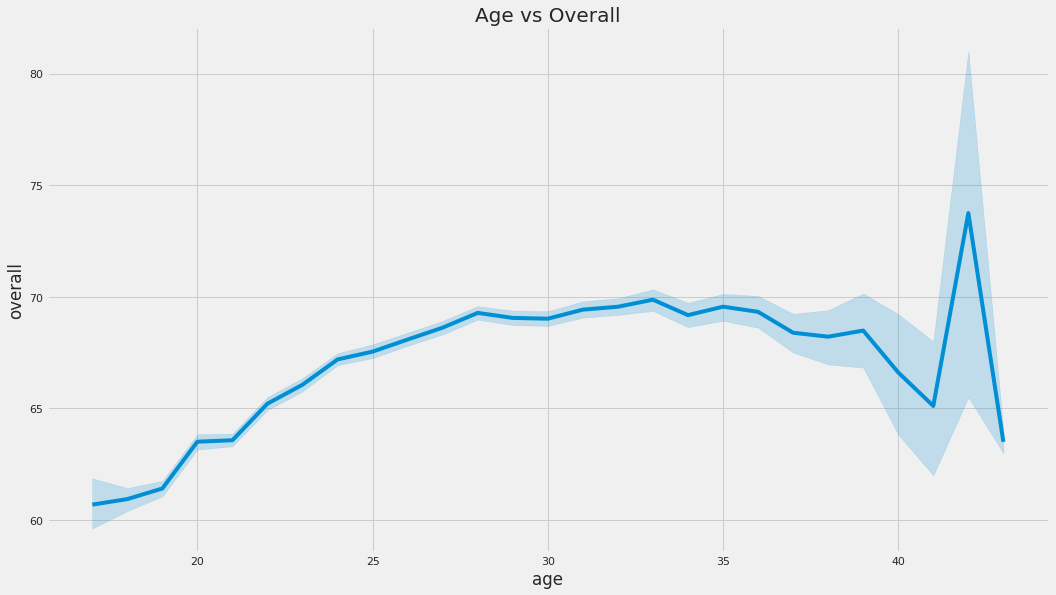

In [34]:
sns.lineplot(data['age'], data['overall'], palette = 'Wistia')
plt.title('Age vs Overall', fontsize = 20)

plt.show()

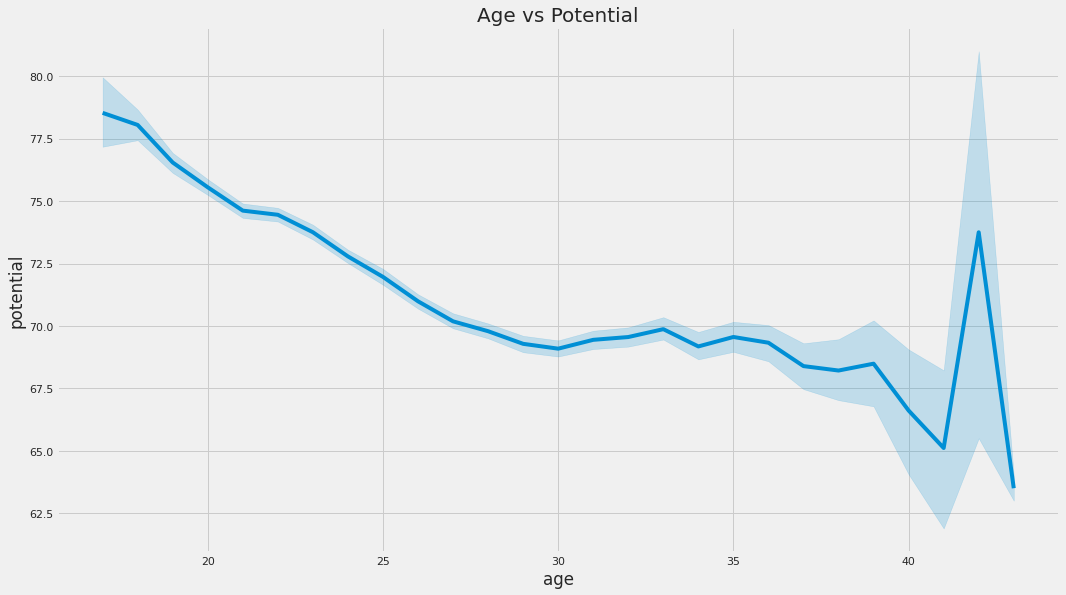

In [35]:
sns.lineplot(data['age'], data['potential'], palette = 'Wistia')
plt.title('Age vs Potential', fontsize = 20)

plt.show()

In [ ]:
rating = pd.DataFrame(data.groupby(['nationality'])['overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('nationality')['overall'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = count['nationality'],
            text = count['nationality'],
            z = count['overall'],
)]

layout = go.Layout(title = 'Country vs Overall Ratings')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)